<a href="https://colab.research.google.com/github/abhinav6190/Lead_Scoring_Case_study/blob/main/Lead_scoring_case_study_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LEAD SCORING CASE STUDY

#### PROBLEM STATEMENT

X Education -  an online edtech company selling courses is currently running at ~30% lead conversion rate. It currently uses saveral websites and google for bringing people to websites and then these leads are converted through watching videos, filling form, calls, SMS etc. Company also uses referrals.
Company wants to identify more leads that have higher conversion rate, calling them 'Hot Leads'.

### GOAL

TO develop a logistic regression model toprovide lead score to each lead. Targetting conversion rate to be higher than 80%.
In addition need to draft responses to following strategic questions:

    1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

    2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

    3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.
    
    4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.


In [1]:
# Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read data

In [6]:
leads_df=pd.read_csv("/content/Leads.csv")

In [7]:
#validate data

In [9]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#Descriptive Analysis of data

In [12]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
#validate data set

In [ ]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

Data Cleanup

In [14]:
#Drop Prospect ID and lead Number

In [15]:
leads_df.drop(['Prospect ID', 'Lead Number'],1, inplace = True)

In [16]:
leads_df = leads_df.replace("Select", np.nan)

In [17]:
(leads_df.isnull().sum()/len(leads_df))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [18]:
#Drop values with missing value>30%

In [20]:
cols=leads_df.columns

for i in cols:
    if(((leads_df[i].isnull().sum()/len(leads_df))*100) >= 30):
        leads_df.drop(i, 1, inplace = True)

In [21]:
(leads_df.isnull().sum()/len(leads_df))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

### Categorical variable assessment

In [22]:
# validate imbalance in binary variables

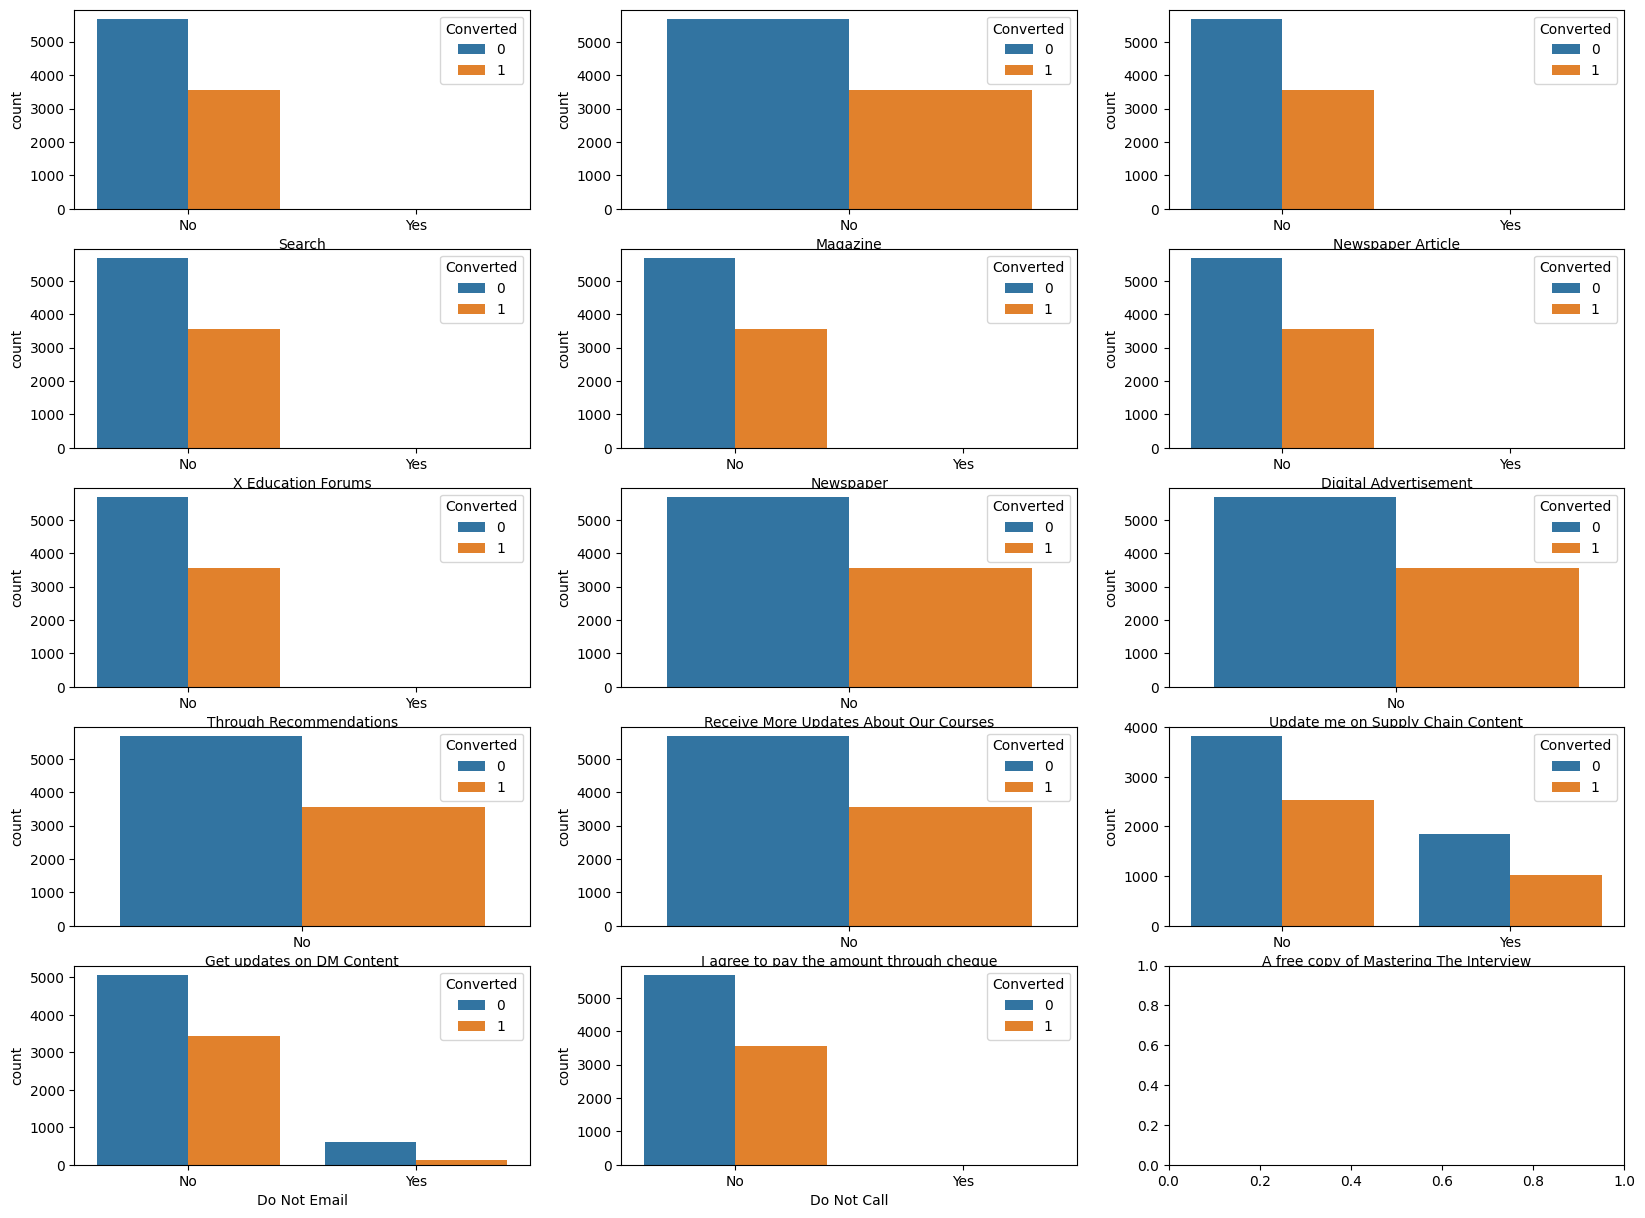

In [23]:
fig, axis = plt.subplots(5,3,figsize = (20,15))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axis[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axis[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axis[0,2])
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axis[1,0])
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axis[1,1])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axis[1,2])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axis[2,0])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axis[2,1])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axis[2,2])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axis[3,0])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axis[3,1])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axis[3,2])
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axis[4,0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axis[4,1])
plt.show()


In [24]:
# all parameters are imbalanced except "A free copy of mastering The Interview" and "Do Not Email"

In [26]:
# drop all above parameters except "A free copy of mastering The Interview" and "Do Not Email"

In [27]:
leads_df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque', 'Do Not Call'],1,inplace = True)

In [28]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   What is your current occupation                6550 

In [29]:
### Checking imbalance of 'Lead Origin'

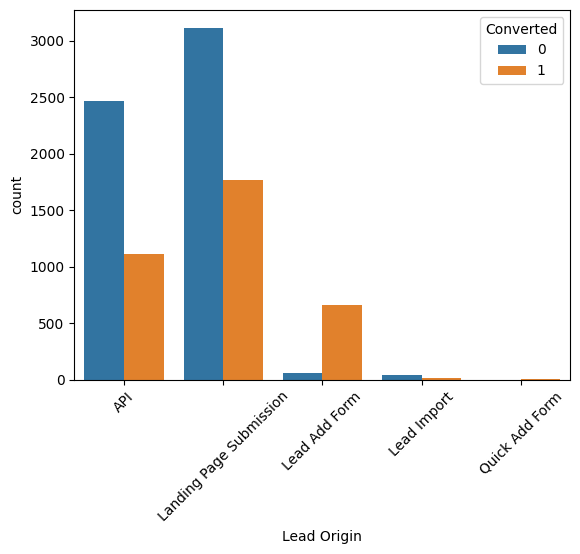

In [30]:
sns.countplot(x='Lead Origin', hue='Converted', data = leads_df)
plt.xticks(rotation = 45)
plt.show()

In [31]:
### Checking imbalance of Lead Source

In [32]:
leads_df['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [33]:
#replacing Nan Value with Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

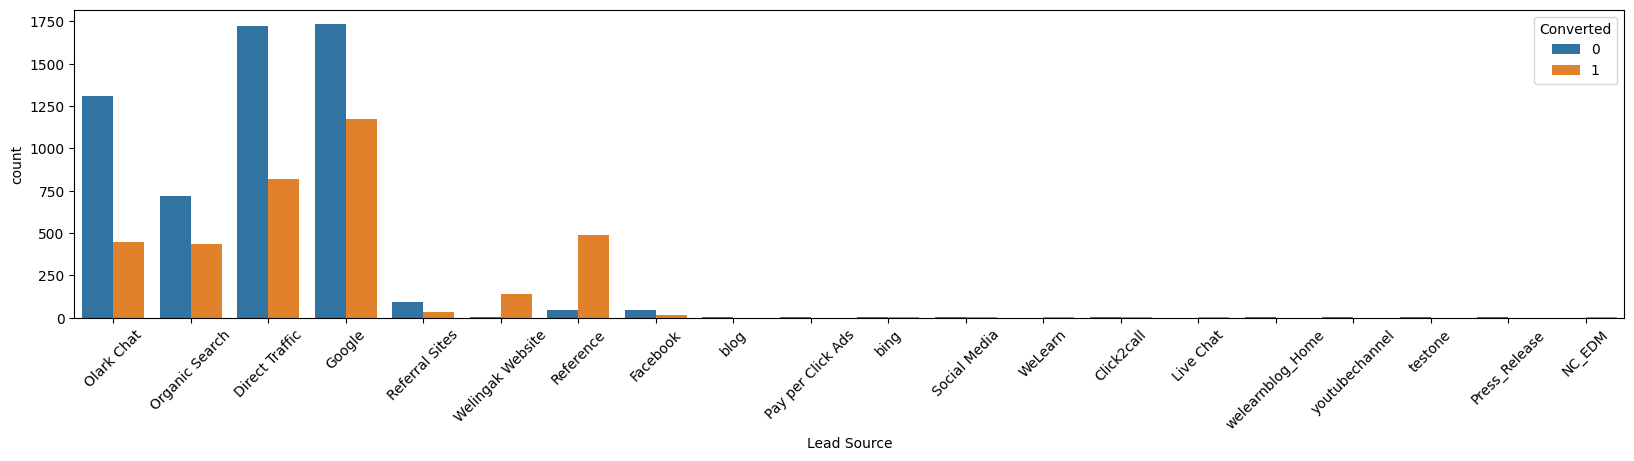

In [34]:
plt.figure(figsize=(20,4))
sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df)
plt.xticks(rotation=45)
plt.show()

In [35]:
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [36]:
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan,'Email Opened')

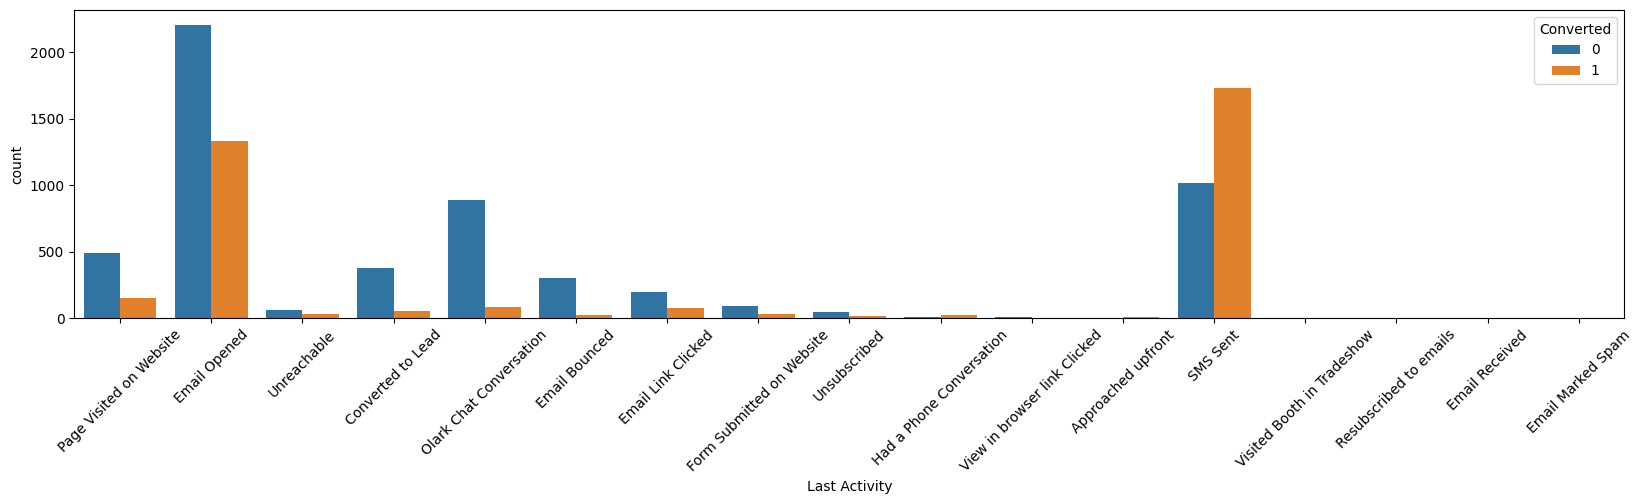

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(x= 'Last Activity', hue='Converted' , data =leads_df)
plt.xticks(rotation=45)
plt.show()

In [38]:
# Since 'SMS Sent' is the only activity that sees the conversion, all other 'Last Activities' are not critical to modeling
# hence the parameter should be dropped

In [39]:
leads_df.drop('Last Activity',1, inplace = True)

In [40]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Country                                        6779 non-null   object 
 8   What is your current occupation                6550 non-null   object 
 9   What matters most to you in choosing a course  6531 

In [41]:
### Country

In [42]:
leads_df.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [43]:
#Since most of the leads are from India only, this is not a critical parameter for modeling

In [44]:
leads_df.drop('Country',1,inplace = True)

In [45]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   What is your current occupation                6550 non-null   object 
 8   What matters most to you in choosing a course  6531 non-null   object 
 9   A free copy of Mastering The Interview         9240 

In [46]:
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [47]:
#replace NaN with Not Available for calculation

In [48]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Not Available')


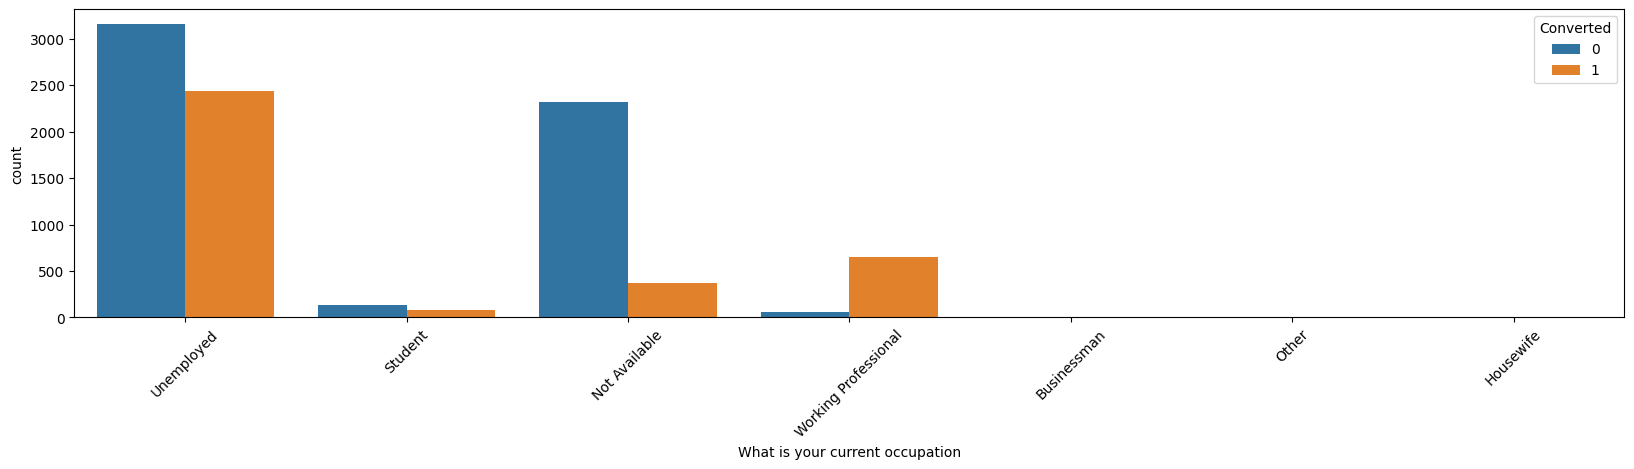

In [49]:
plt.figure(figsize=(20,4))
sns.countplot(x= 'What is your current occupation', hue='Converted' , data =leads_df)
plt.xticks(rotation=45)
plt.show()

In [50]:
#What matters most to you in choosing a course

In [51]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

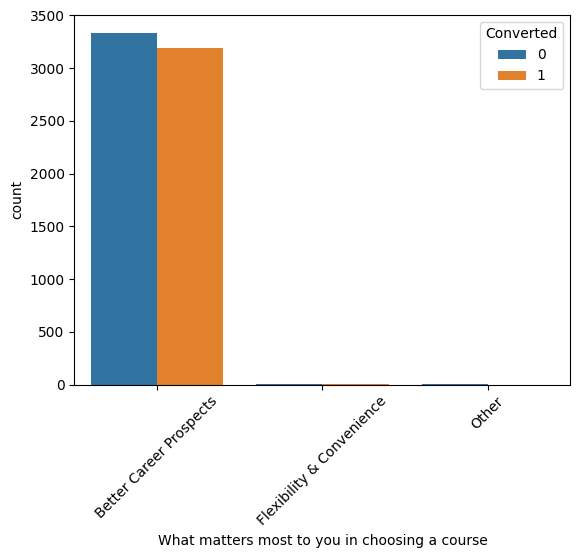

In [52]:
sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data =leads_df)
plt.xticks(rotation=45)
plt.show()

In [53]:
leads_df.drop('What matters most to you in choosing a course', 1, inplace = True)

In [54]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [55]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

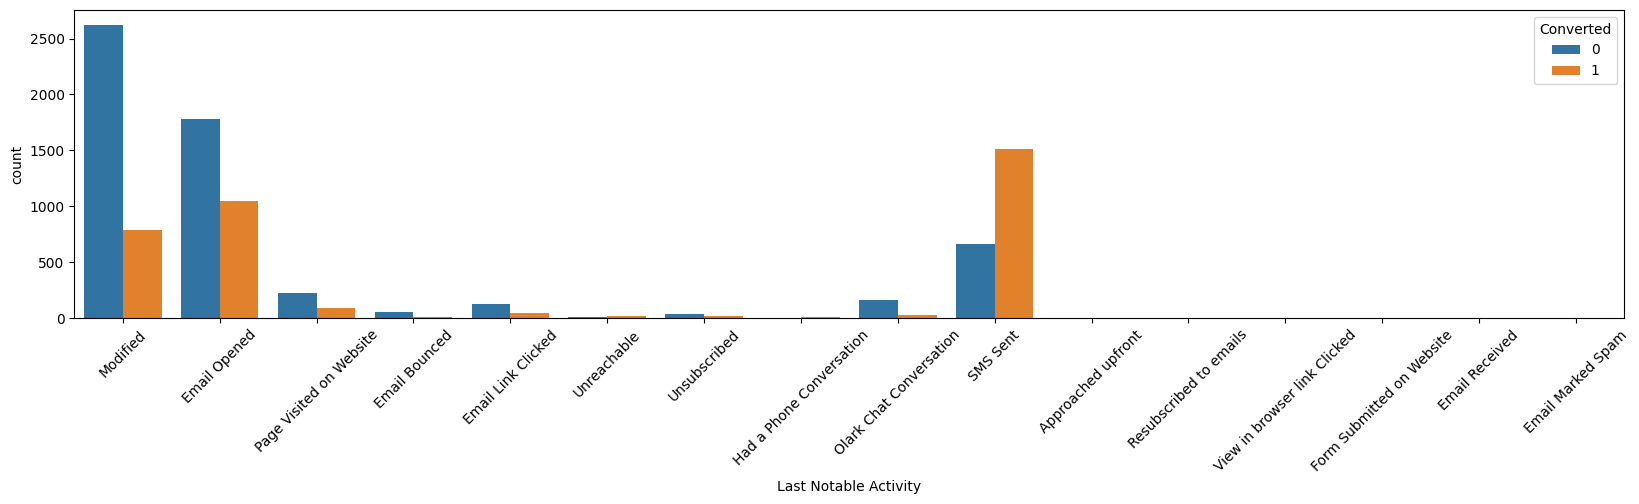

In [56]:
plt.figure(figsize=(20,4))
sns.countplot(x= 'Last Notable Activity', hue='Converted' , data =leads_df)
plt.xticks(rotation=45)
plt.show()

In [57]:
# Similar to Last Activity. SMS sent is the onty category that has a positive ratio. there for Last Notable activity should also be dropped.

In [58]:
leads_df.drop('Last Notable Activity', 1, inplace = True)

In [59]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


## Numerical data analysis

In [60]:
# Converted

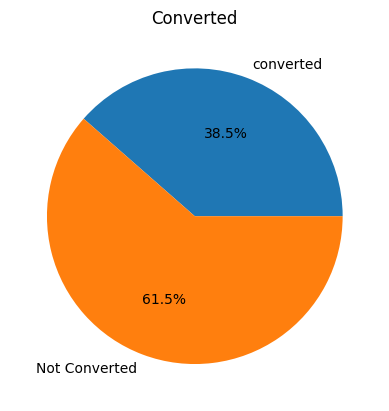

In [61]:
Converted = (sum(leads_df['Converted'])/len(leads_df['Converted']))*100
mylabels = ["converted", "Not Converted"]
plt.pie([Converted,100-Converted], labels = mylabels,autopct='%1.1f%%')
plt.title("Converted")
plt.show()

In [62]:
# current conversion rate is 38.5%

In [63]:
# Correlation of Numerical data

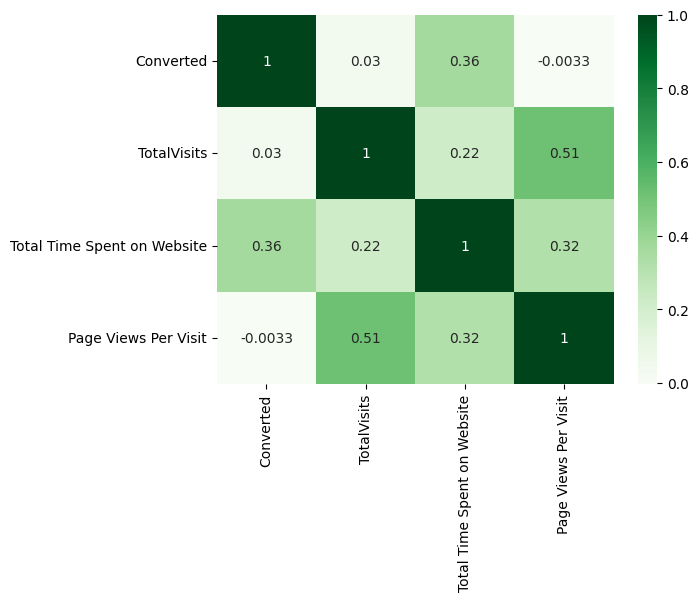

In [64]:
sns.heatmap(leads_df.corr(), cmap= 'Greens', annot=True)
plt.show()

In [65]:
# No strong correlation observed. Maximum correlation is 0.51 with total visits

In [66]:
# Total Visits

<Axes: >

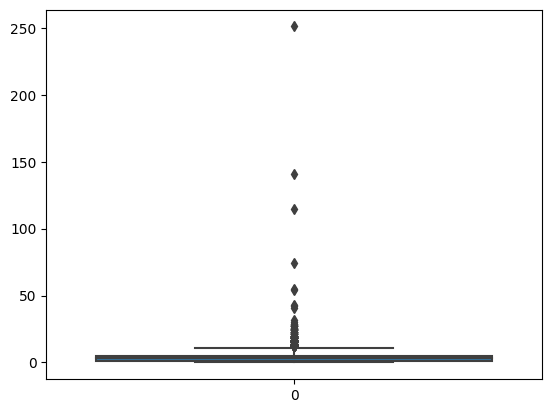

In [67]:
sns.boxplot(leads_df.TotalVisits)

In [69]:
# replace NaN with zero

leads_df.TotalVisits = leads_df.TotalVisits.replace(np.nan, 0)

#checking percentile values for "Total Visits"

leads_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75,.95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [70]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [71]:
leads_df = leads_df[leads_df.TotalVisits<=10]
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8887 non-null   object 
 1   Lead Source                             8887 non-null   object 
 2   Do Not Email                            8887 non-null   object 
 3   Converted                               8887 non-null   int64  
 4   TotalVisits                             8887 non-null   float64
 5   Total Time Spent on Website             8887 non-null   int64  
 6   Page Views Per Visit                    8750 non-null   float64
 7   What is your current occupation         8887 non-null   object 
 8   A free copy of Mastering The Interview  8887 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 694.3+ KB


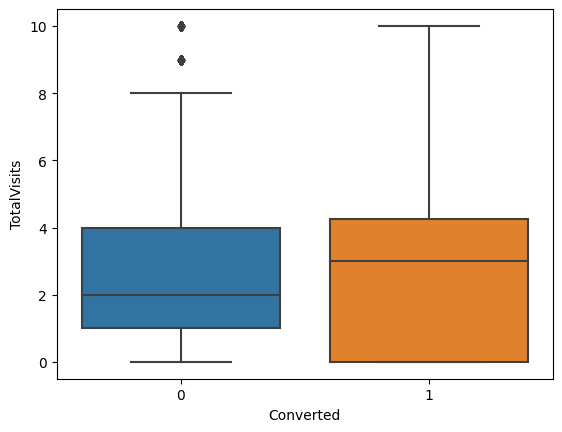

In [72]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

In [73]:
# Total Time Spend on Website

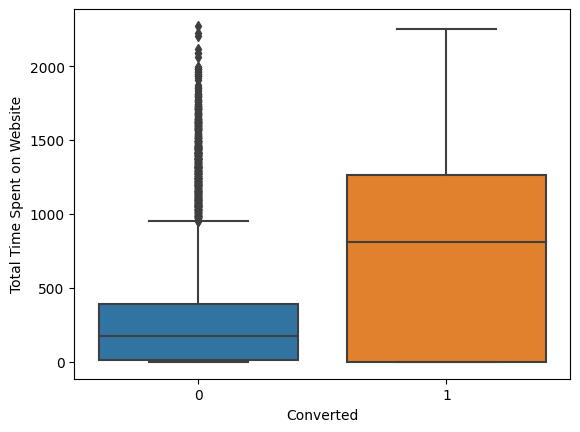

In [74]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

In [75]:
# Page views per visit

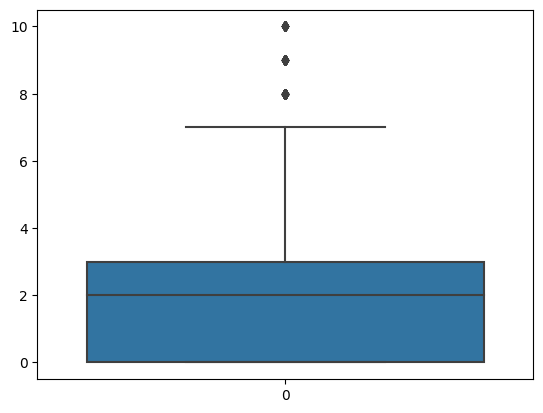

In [76]:
sns.boxplot(leads_df['Page Views Per Visit'])
plt.show()

In [77]:
leads_df['Page Views Per Visit']= leads_df['Page Views Per Visit'].replace(np.nan, 0)

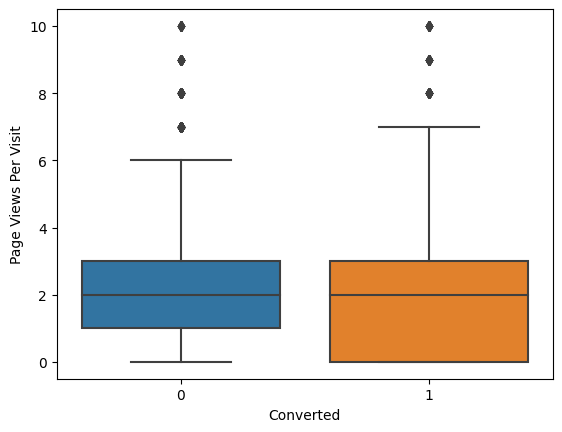

In [78]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

# Data Preparation

In [79]:
#Dummy Variable creation

In [80]:
categorical_columns= leads_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [81]:
dummy = pd.get_dummies(leads_df[categorical_columns], drop_first=True)
leads_df = pd.concat([leads_df,dummy],1)

In [82]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,...,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed,No,0,...,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed,No,0,...,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student,Yes,1,...,0,0,0,0,0,0,1,0,0,1
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed,No,1,...,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed,No,1,...,0,0,0,0,0,0,0,1,0,0


In [83]:
leads_df.drop(categorical_columns,1,inplace = True)

In [84]:
leads_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Test-Train split


In [85]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [86]:
# Putting feature variable to X and response variable to y
y = leads_df['Converted']
X=leads_df.drop('Converted', axis=1)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=90)

# Feature Scaling

In [88]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6220 entries, 7806 to 4080
Data columns (total 34 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6220 non-null   float64
 1   Total Time Spent on Website                           6220 non-null   int64  
 2   Page Views Per Visit                                  6220 non-null   float64
 3   Lead Origin_Landing Page Submission                   6220 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6220 non-null   uint8  
 5   Lead Origin_Lead Import                               6220 non-null   uint8  
 6   Lead Origin_Quick Add Form                            6220 non-null   uint8  
 7   Lead Source_Direct Traffic                            6220 non-null   uint8  
 8   Lead Source_Facebook                                  6

In [90]:
scaler = StandardScaler()
numerical_columns=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
7806,-0.352789,-0.247049,-0.112528,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
926,0.452772,0.375219,0.932382,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3565,0.452772,1.196318,0.932382,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7572,-1.158349,-0.871158,-1.157437,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4363,-0.352789,-0.814086,-0.112528,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


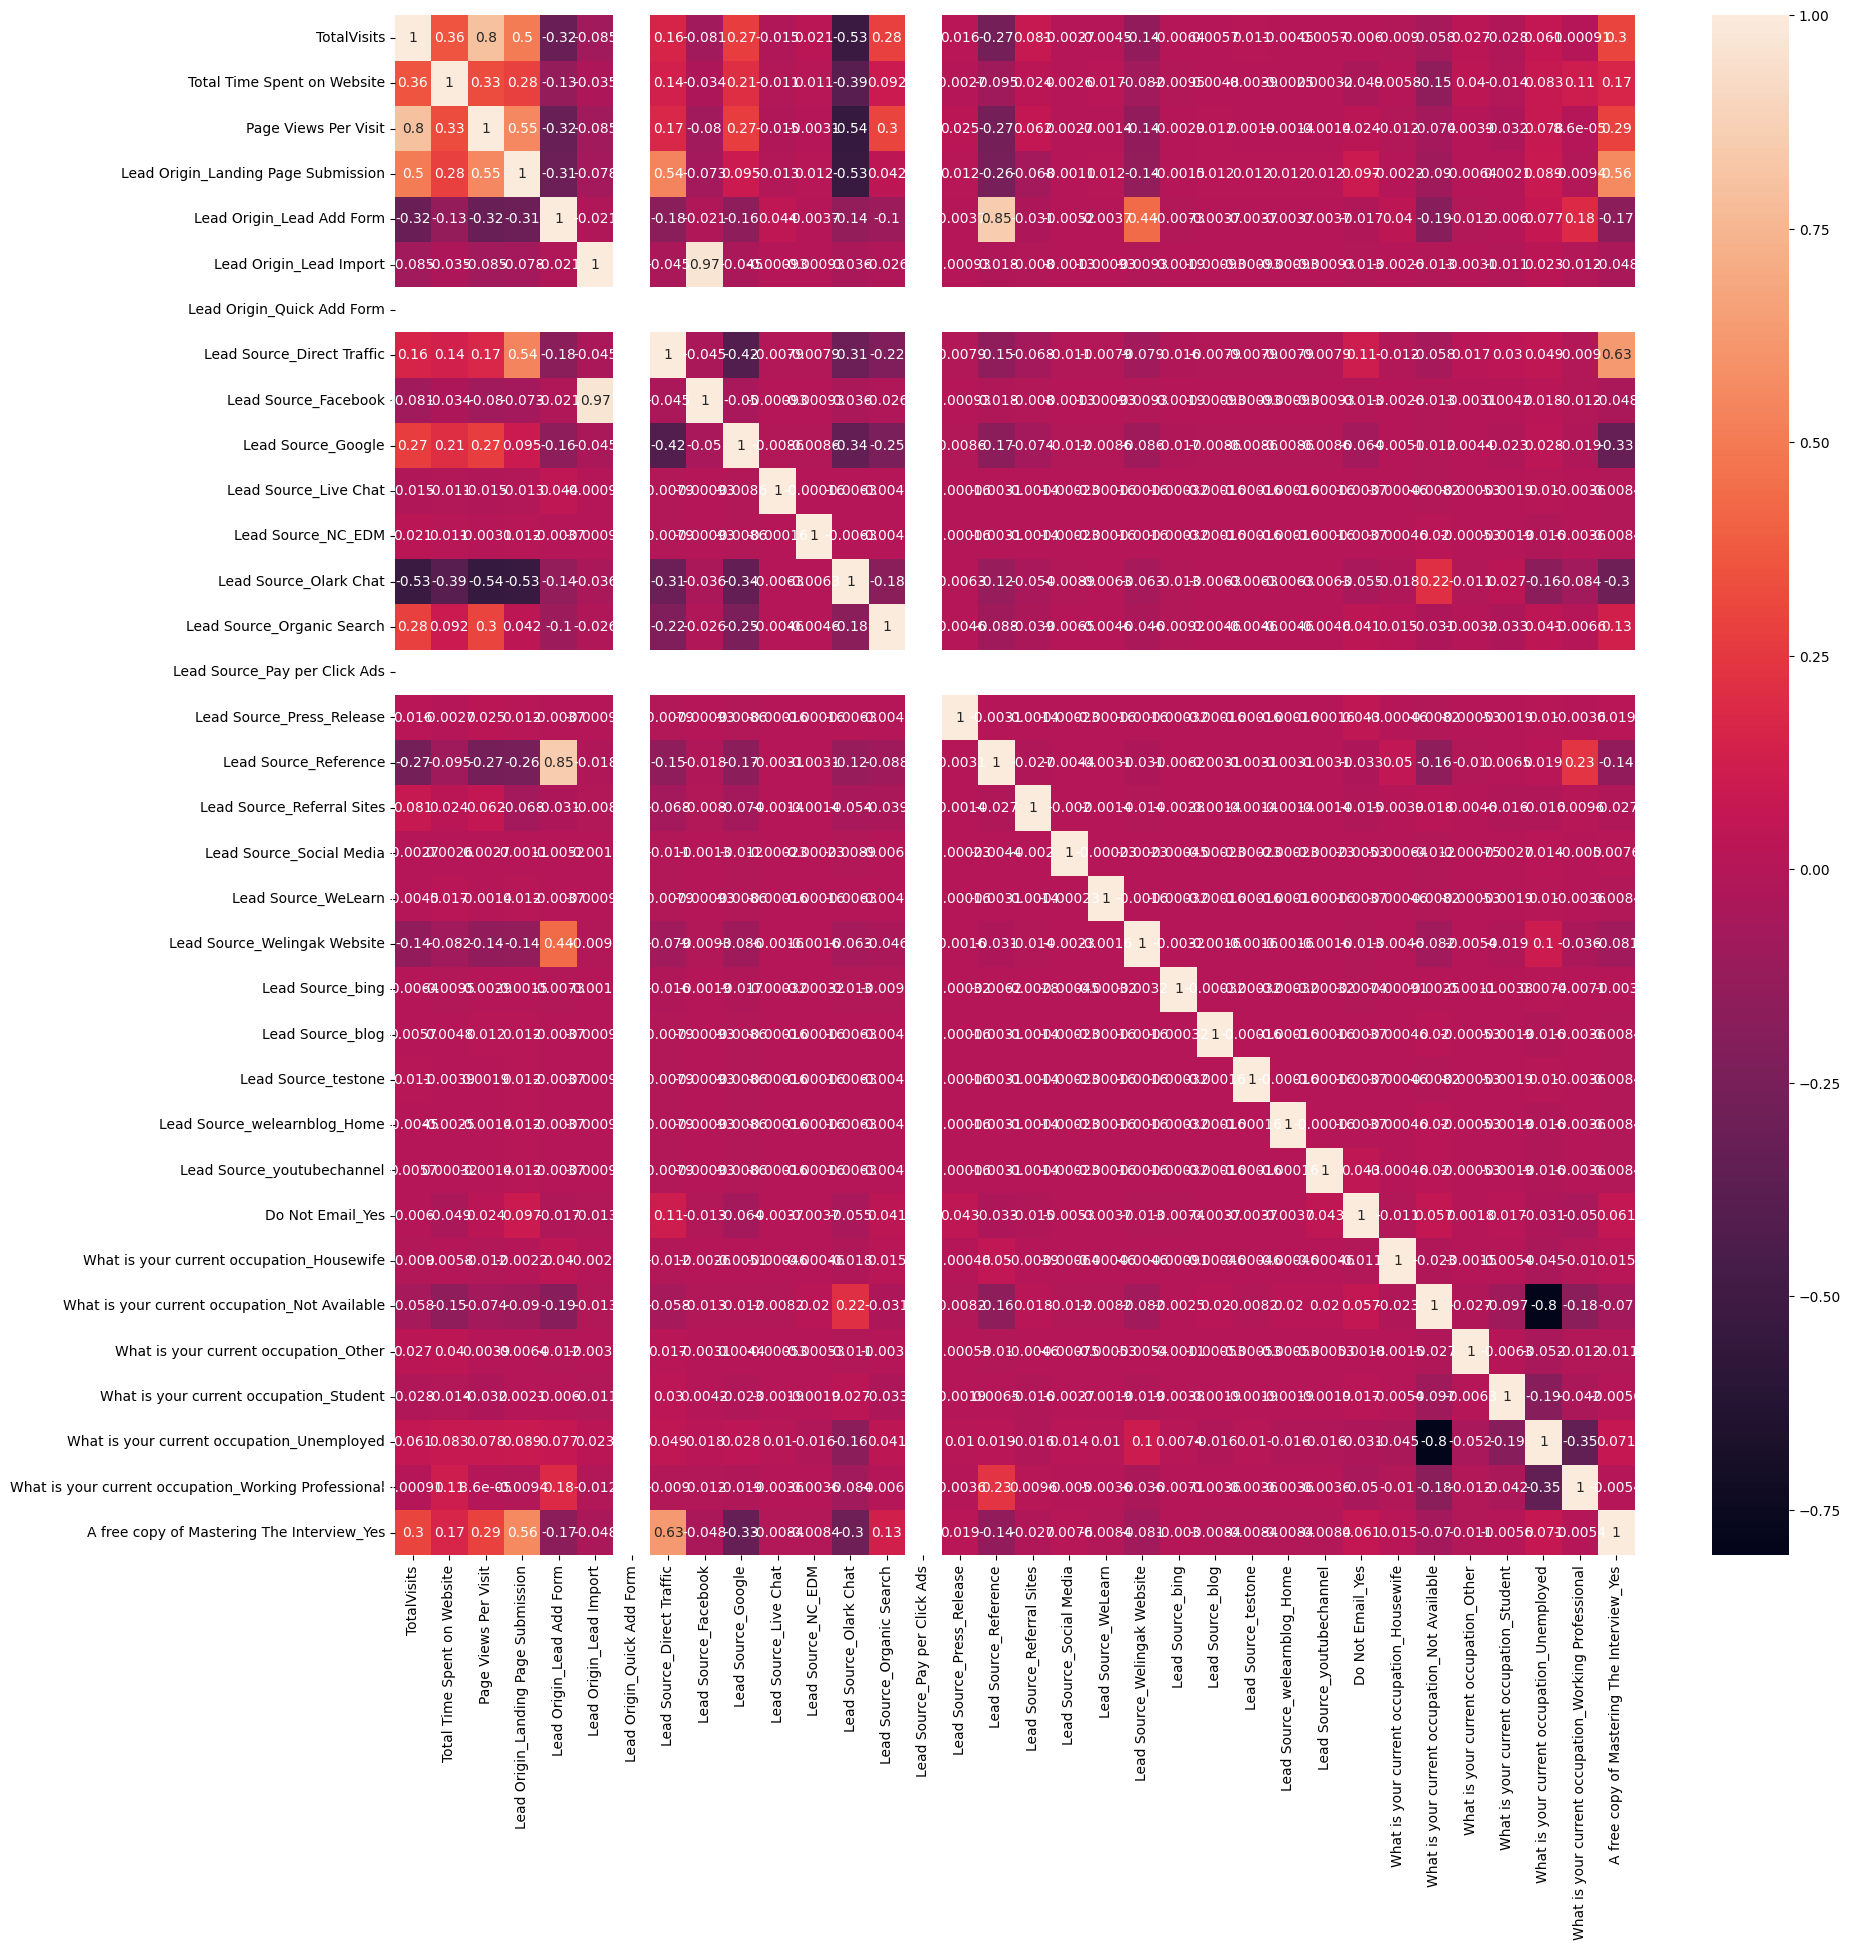

In [91]:
# correlation matrix
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [92]:
#Dropping highly correlated (>0.8 or <-0.8) and blank columns

In [93]:
drop_list = ['TotalVisits','Lead Origin_Lead Add Form', 'Lead Origin_Lead Import','Lead Origin_Quick Add Form','What is your current occupation_Not Available','Lead Source_Pay per Click Ads']

In [94]:
X_test = X_test.drop(X_test[drop_list],1)
X_train = X_train.drop(X_train[drop_list],1)

In [95]:
X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
7806,-0.247049,-0.112528,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
926,0.375219,0.932382,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3565,1.196318,0.932382,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7572,-0.871158,-1.157437,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4363,-0.814086,-0.112528,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


# Model Building and RFE

In [96]:
# importing necessary library
import statsmodels.api as sm

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
# targeting 15 features in output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [101]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False])

In [102]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [103]:
## Model Building : Iteration 1

In [104]:
X_train_sm = sm.add_constant(X_train[selected_columns])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6204
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.4
Date:                Sun, 20 Aug 2023   Deviance:                       5640.8
Time:                        15:26:41   Pearson chi2:                 7.00e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3431
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1226      0.095    -11.876      0.000      -1.308      -0.937
Total Time Spent on Website                              1.0566      0.039     27.232      0.000       0.981       1.133
Lead Source_Direct Traffic                              -1.1103      0.108    -10.321      0.000      -1.321      -0.899
Lead Source_Facebook                                    -0.7939      0.469     -1.694      0.090      -1.712       0.125
Lead Source_Google                                      -0.7738      0.103     -7.510      0.000      -0.976      -0.572
Lead Source_Live Chat                                   23.2806   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Organic Search                              -0.9288      0.128     -7.246      0.000      -1.180      -0.678
Lead Source_Reference                                    2.4979      0.213     11.729      0.000       2.080       2.915
Lead Source_Referral Sites                              -1.4702      0.353     -4.159      0.000      -2.163      -0.777
Lead Source_Welingak Website                             4.5881      0.721      6.364      0.000       3.175       6.001
Do Not Email_Yes                                        -1.1453      0.159     -7.198      0.000      -1.457      -0.833
What is your current occupation_Housewife               23.7109   1.47e+04      0.002      0.999   -2.88e+04    2.88e+04
What is your current occupation_Other                    0.8514      0.655      1.301      0.193      -0.432       2.135
What is your current occupation_Student                  1.1984      0.217      5.517      0.000       0.773       1.624
What is your current occupation_Unemployed               1.3285      0.084     15.862      0.000       1.164       1.493
What is your current occupation_Working Professional     3.8867      0.201     19.358      0.000       3.493       4.280
========================================================================================================================
"""

In [105]:
# dropping feature 'Lead Source_Live Chat'
selected_columns = selected_columns.drop('Lead Source_Live Chat',1)

In [106]:
# Iteration 2

In [107]:
X_train_sm = sm.add_constant(X_train[selected_columns])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6205
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2821.5
Date:                Sun, 20 Aug 2023   Deviance:                       5643.0
Time:                        15:26:50   Pearson chi2:                 7.00e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3429
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1201      0.094    -11.858      0.000      -1.305      -0.935
Total Time Spent on Website                              1.0565      0.039     27.229      0.000       0.980       1.133
Lead Source_Direct Traffic                              -1.1139      0.108    -10.359      0.000      -1.325      -0.903
Lead Source_Facebook                                    -0.7977      0.469     -1.702      0.089      -1.716       0.121
Lead Source_Google                                      -0.7774      0.103     -7.549      0.000      -0.979      -0.576
Lead Source_Organic Search                              -0.9324      0.128     -7.277      0.000      -1.184      -0.681
Lead Source_Reference                                    2.4940      0.213     11.712      0.000       2.077       2.911
Lead Source_Referral Sites                              -1.4738      0.353     -4.170      0.000      -2.167      -0.781
Lead Source_Welingak Website                             4.5841      0.721      6.358      0.000       3.171       5.997
Do Not Email_Yes                                        -1.1457      0.159     -7.201      0.000      -1.458      -0.834
What is your current occupation_Housewife               23.7121   1.47e+04      0.002      0.999   -2.88e+04    2.88e+04
What is your current occupation_Other                    0.8524      0.655      1.302      0.193      -0.431       2.135
What is your current occupation_Student                  1.1985      0.217      5.518      0.000       0.773       1.624
What is your current occupation_Unemployed               1.3301      0.084     15.883      0.000       1.166       1.494
What is your current occupation_Working Professional     3.8874      0.201     19.361      0.000       3.494       4.281
========================================================================================================================
"""

In [108]:
# dropping feature 'What is your current occupation_Housewife'
selected_columns = selected_columns.drop('What is your current occupation_Housewife',1)

In [109]:
#Iteration 3

In [110]:
X_train_sm = sm.add_constant(X_train[selected_columns])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6206
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2831.2
Date:                Sun, 20 Aug 2023   Deviance:                       5662.4
Time:                        15:27:02   Pearson chi2:                 7.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3408
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1021      0.094    -11.731      0.000      -1.286      -0.918
Total Time Spent on Website                              1.0556      0.039     27.251      0.000       0.980       1.131
Lead Source_Direct Traffic                              -1.1049      0.107    -10.293      0.000      -1.315      -0.895
Lead Source_Facebook                                    -0.7912      0.468     -1.690      0.091      -1.709       0.127
Lead Source_Google                                      -0.7678      0.103     -7.471      0.000      -0.969      -0.566
Lead Source_Organic Search                              -0.9137      0.128     -7.152      0.000      -1.164      -0.663
Lead Source_Reference                                    2.5377      0.213     11.926      0.000       2.121       2.955
Lead Source_Referral Sites                              -1.4693      0.353     -4.161      0.000      -2.161      -0.777
Lead Source_Welingak Website                             4.5939      0.721      6.372      0.000       3.181       6.007
Do Not Email_Yes                                        -1.1528      0.159     -7.246      0.000      -1.465      -0.841
What is your current occupation_Other                    0.8270      0.655      1.264      0.206      -0.456       2.110
What is your current occupation_Student                  1.1724      0.217      5.401      0.000       0.747       1.598
What is your current occupation_Unemployed               1.3025      0.083     15.695      0.000       1.140       1.465
What is your current occupation_Working Professional     3.8591      0.200     19.250      0.000       3.466       4.252
========================================================================================================================
"""

In [111]:
# dropping feature 'What is your current occupation_Other'
selected_columns = selected_columns.drop('What is your current occupation_Other',1)

In [112]:
#Iteration 4

In [113]:
X_train_sm = sm.add_constant(X_train[selected_columns])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6207
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.0
Date:                Sun, 20 Aug 2023   Deviance:                       5663.9
Time:                        15:27:13   Pearson chi2:                 7.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3406
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0937      0.094    -11.685      0.000      -1.277      -0.910
Total Time Spent on Website                              1.0574      0.039     27.309      0.000       0.982       1.133
Lead Source_Direct Traffic                              -1.1030      0.107    -10.278      0.000      -1.313      -0.893
Lead Source_Facebook                                    -0.7904      0.468     -1.688      0.091      -1.708       0.127
Lead Source_Google                                      -0.7670      0.103     -7.465      0.000      -0.968      -0.566
Lead Source_Organic Search                              -0.9143      0.128     -7.156      0.000      -1.165      -0.664
Lead Source_Reference                                    2.5398      0.213     11.938      0.000       2.123       2.957
Lead Source_Referral Sites                              -1.4711      0.353     -4.166      0.000      -2.163      -0.779
Lead Source_Welingak Website                             4.5963      0.721      6.375      0.000       3.183       6.009
Do Not Email_Yes                                        -1.1506      0.159     -7.237      0.000      -1.462      -0.839
What is your current occupation_Student                  1.1631      0.217      5.362      0.000       0.738       1.588
What is your current occupation_Unemployed               1.2930      0.083     15.670      0.000       1.131       1.455
What is your current occupation_Working Professional     3.8498      0.200     19.221      0.000       3.457       4.242
========================================================================================================================
"""

In [114]:
# dropping feature 'Lead Source_Facebook'
selected_columns = selected_columns.drop('Lead Source_Facebook',1)

In [115]:
#Iteration 5

In [116]:
X_train_sm = sm.add_constant(X_train[selected_columns])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6220
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2833.6
Date:                Sun, 20 Aug 2023   Deviance:                       5667.1
Time:                        15:27:20   Pearson chi2:                 7.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3403
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1128      0.093    -11.940      0.000      -1.295      -0.930
Total Time Spent on Website                              1.0556      0.039     27.279      0.000       0.980       1.131
Lead Source_Direct Traffic                              -1.0781      0.106    -10.124      0.000      -1.287      -0.869
Lead Source_Google                                      -0.7424      0.102     -7.285      0.000      -0.942      -0.543
Lead Source_Organic Search                              -0.8896      0.127     -7.000      0.000      -1.139      -0.641
Lead Source_Reference                                    2.5634      0.212     12.069      0.000       2.147       2.980
Lead Source_Referral Sites                              -1.4463      0.353     -4.101      0.000      -2.137      -0.755
Lead Source_Welingak Website                             4.6199      0.721      6.409      0.000       3.207       6.033
Do Not Email_Yes                                        -1.1513      0.159     -7.243      0.000      -1.463      -0.840
What is your current occupation_Student                  1.1577      0.217      5.335      0.000       0.732       1.583
What is your current occupation_Unemployed               1.2869      0.082     15.616      0.000       1.125       1.448
What is your current occupation_Working Professional     3.8436      0.200     19.200      0.000       3.451       4.236
========================================================================================================================
"""

In [117]:
#Model 5 is stable. Check for VIF

# VIF

In [118]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,Total Time Spent on Website,1.10
1,Lead Source_Direct Traffic,1.73
2,Lead Source_Google,1.72
3,Lead Source_Organic Search,1.30
4,Lead Source_Reference,1.28
5,Lead Source_Referral Sites,1.02
6,Lead Source_Welingak Website,1.07
7,Do Not Email_Yes,1.11
8,What is your current occupation_Student,1.05
9,What is your current occupation_Unemployed,2.56


# Model prediction on training Data

In [119]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)

In [120]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Model_prob':y_train_pred})

In [121]:
#y_train_pred_df['Prospect ID'] = y_train.index
y_train_pred_df.head()

,Converted,Model_prob
7806,0,0.237803
926,0,0.328122
3565,0,0.666980
7572,0,0.115852
4363,0,0.146377


In [122]:
y_train_pred_df['Predicted'] = y_train_pred_df.Model_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Model_prob,Predicted
7806,0,0.237803,0
926,0,0.328122,0
3565,0,0.666980,1
7572,0,0.115852,0
4363,0,0.146377,0


## Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Predictive Values

In [123]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted)
print(confusion)

[[3463  400]
 [ 875 1482]]


In [124]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted))

0.795016077170418


In [125]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# sensitivity
TP / float(TP+FN)

0.628765379719983

In [127]:
# specificity
TN / float(TN+FP)

0.8964535335231685

In [128]:
# False Postive Rate
FP/ float(TN+FP)

0.10354646647683148

In [129]:
# positive predictive value
TP / float(TP+FP)

0.7874601487778958

In [130]:
# Negative predictive value
TN / float(TN+ FN)

0.7982941447671739

## ROC Curve

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Model_prob, drop_intermediate = False)


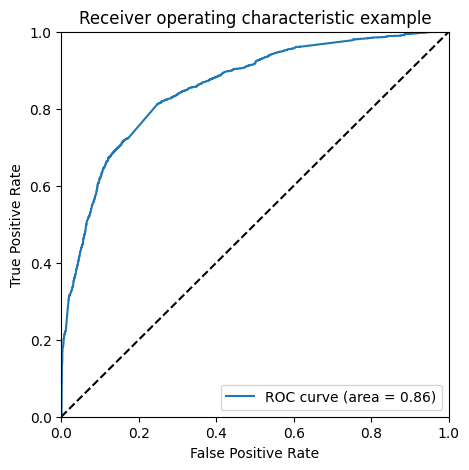

In [134]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Model_prob)

In [135]:
# ROC value of 0.86 is closer to 1 therefore model is a good fit.

# Finding Optimal cutoff point

In [136]:
# create columns with different probability cutoffs
numbers = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Model_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Model_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7806,0,0.237803,0,1,1,1,0,0,0,0,0,0,0
926,0,0.328122,0,1,1,1,1,0,0,0,0,0,0
3565,0,0.666980,1,1,1,1,1,1,1,1,0,0,0
7572,0,0.115852,0,1,1,0,0,0,0,0,0,0,0
4363,0,0.146377,0,1,1,0,0,0,0,0,0,0,0


In [137]:
# calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total

    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378939  1.000000  0.000000
0.1   0.1  0.511093  0.981756  0.223919
0.2   0.2  0.680064  0.904115  0.543360
0.3   0.3  0.765916  0.822232  0.731556
0.4   0.4  0.797428  0.686042  0.865390
0.5   0.5  0.795016  0.628765  0.896454
0.6   0.6  0.780386  0.554094  0.918457
0.7   0.7  0.759164  0.456937  0.943567
0.8   0.8  0.734727  0.351718  0.968418
0.9   0.9  0.694051  0.203224  0.993528


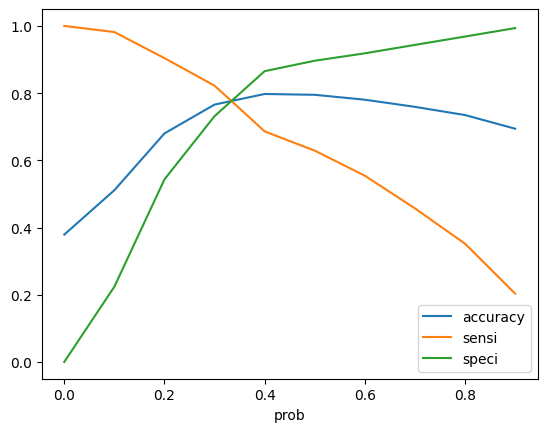

In [138]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [139]:
#  0.3 is the optimum point to be taken as a cutoff probability.

In [140]:
y_train_pred_df['final_Predicted'] = y_train_pred_df.Model_prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_df.head()


,Converted,Model_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
7806,0,0.237803,0,1,1,1,0,0,0,0,0,0,0,0
926,0,0.328122,0,1,1,1,1,0,0,0,0,0,0,1
3565,0,0.666980,1,1,1,1,1,1,1,1,0,0,0,1
7572,0,0.115852,0,1,1,0,0,0,0,0,0,0,0,0
4363,0,0.146377,0,1,1,0,0,0,0,0,0,0,0,0


In [141]:
y_train_pred_df['Lead_Score'] = y_train_pred_df.Model_prob.map( lambda x: round(x*100))

y_train_pred_df[['Converted','Model_prob','final_Predicted','Lead_Score']].head()

,Converted,Model_prob,final_Predicted,Lead_Score
7806,0,0.237803,0,24
926,0,0.328122,1,33
3565,0,0.666980,1,67
7572,0,0.115852,0,12
4363,0,0.146377,0,15


In [142]:
# checking if 80% cases are correctly predicted.

checking_df = y_train_pred_df.loc[y_train_pred_df['Converted']==1,['final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1938
0     419
Name: final_Predicted, dtype: int64

In [143]:
1938/(1938+419)

0.8222316504030547

In [144]:
# 80%+ current prediction means model is meeting CEO expectation

# Prediction on Test data

In [145]:
#scaling test data

numerical_columns=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])
X_test.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
5180,-0.891590,-1.126616,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2678,-0.215149,-0.616829,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
824,-0.087862,1.932106,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
989,-0.180599,0.147852,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4240,0.835881,1.422319,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# selecting columns in Test data set
X_test = X_test[selected_columns]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
5180,-0.891590,0,0,0,0,0,0,0,0,1,0
2678,-0.215149,0,1,0,0,0,0,0,0,0,0
824,-0.087862,0,1,0,0,0,0,0,0,0,1
989,-0.180599,0,0,1,0,0,0,0,0,0,0
4240,0.835881,0,1,0,0,0,0,0,0,0,0


In [152]:
#add constant to test data
X_test_sm = sm.add_constant(X_test)

In [153]:
# predict value of y in test
y_test_pred = res.predict(X_test_sm)

In [149]:
# Convert y-test series to dataframe
y_test_df = pd.DataFrame(y_test)

In [150]:
y_test_df['Model_test_prob'] = y_test_pred

In [154]:
y_test_df.head()

,Converted,Model_test_prob
5180,1,0.317135
2678,0,0.110835
824,1,0.869410
989,0,0.100384
4240,1,0.274320


In [155]:
# convert probability to a score

In [156]:
y_test_df['Lead_Score'] = y_test_df.Model_test_prob.map( lambda x: round(x*100))

In [157]:
y_test_df.head()

,Converted,Model_test_prob,Lead_Score
5180,1,0.317135,32
2678,0,0.110835,11
824,1,0.869410,87
989,0,0.100384,10
4240,1,0.274320,27


In [165]:
y_test_df['Final_Predicted'] = y_test_df.Model_test_prob.map(lambda x: 1 if x > 0.3 else 0)

In [166]:
y_test_df.head()

,Converted,Model_test_prob,Lead_Score,final_Predicted,Final_Predicted
5180,1,0.317135,32,1,1
2678,0,0.110835,11,0,0
824,1,0.869410,87,1,1
989,0,0.100384,10,0,0
4240,1,0.274320,27,0,0


In [167]:
# checking for 80% Accuracy on test data

In [168]:
checking_test_df = y_test_df.loc[y_test_df['Converted']==1,['Final_Predicted']]
checking_test_df['Final_Predicted'].value_counts()

1    871
0    168
Name: Final_Predicted, dtype: int64

In [162]:
871/(871+168)

0.8383060635226179

In [164]:
# 83% conversion target met on test data as well. Which is close to training set.

In [170]:
# overall accuracy on test data.
metrics.accuracy_score(y_test_df.Converted, y_test_df.Final_Predicted)

0.7649043869516311

In [171]:
confusion_test = metrics.confusion_matrix(y_test_df.Converted, y_test_df.Final_Predicted )
confusion_test

array([[1169,  459],
       [ 168,  871]])

In [172]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [173]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.8383060635226179

In [174]:
#specificity
TN / float(TN+FP)

0.7180589680589681

Outcome of the model on Test Data:

Accuracy : 76.49%

Sensitivity :83.83%

Specificity : 71.80%